# House Prices: Advanced Regression Techniques
### Fateme Seyyed Dabbaghi 810197529
#### The aim of this project is to get acquainted with machine learning methods. It has 4 phases. In phase 1 we do some data analysis (‫‪Exploratory‬‬ ‫‪Data‬‬ ‫‪Analysis‬‬). Then in phase 2, we do data processing. Phase 3 is about Model Training, Evaluation, and Hyperparameter Tuning. We use SciKit-Learn library for this approach and our models are based on Linear Regression, Decision Tree, and K-Nearest-Neighbors. And in phase 4 using the models in phase 3, we implement several ‫‪Ensemble‬‬ ‫‪Learning‬‬ methods and analyze the results.
We are given a dataset containing different features of different houses. We also have target data which is price of each house. Our goal is to divide the data into two parts and train the first part and guess the result of the target column in the second part. 

In [1]:
import pandas as pd
import numpy as np
import time
from scipy import stats
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from heatmap import heatmap, corrplot
import seaborn as sns
from statistics import median

In [2]:
pd.set_option('display.max_columns', None)
train = pd.read_csv ('train.csv')
train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd       None   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   

## ‫‪Phase 0: Visualization‬‬ ‫‪and‬‬ ‫‪EDA‬‬

### 1) overall structure of the data

In [3]:
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### 2) missing values

In [5]:
missing_values = train.isna().sum()/train.count()['Id']*100
missing_values = missing_values[missing_values != 0]
train.drop('Id', axis = 1, inplace = True)
pd.set_option('display.max_rows', None)
print(missing_values)

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64


### Note
As we see the results of the above part for some features like Alley the percentage of missing value is high. But by reading the ‫‪data_description‬‬ file we realize that the NA value means "no Alley access". This problem also happens in other features. we will handle with them later.

Text(0, 0.5, 'Percent of missing values')

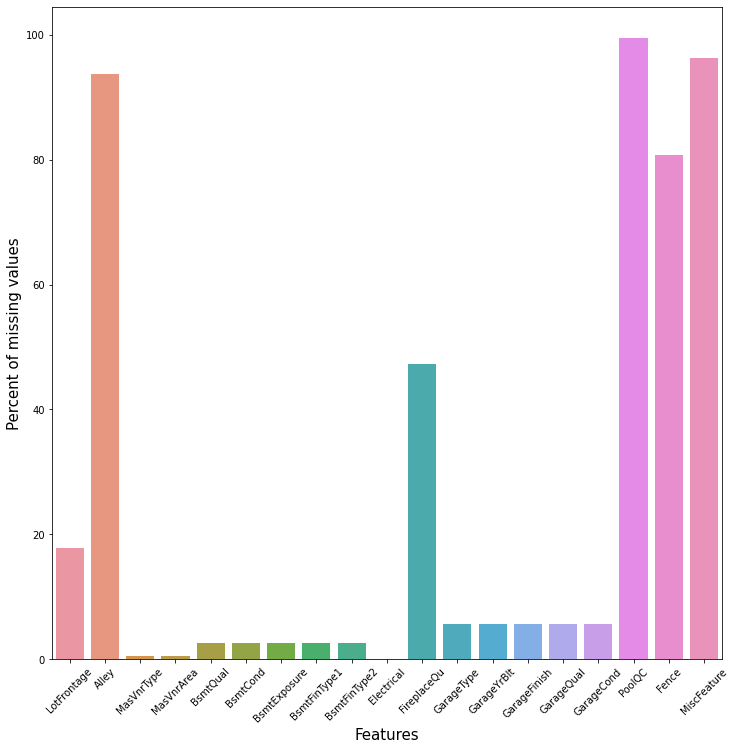

In [6]:
plt.subplots(figsize=(12, 12))
plt.xticks(rotation='45')
sns.barplot(x=missing_values.index, y=missing_values)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)

### 3) Data Correlation
We use this map to see how features can correlate with the sales price.

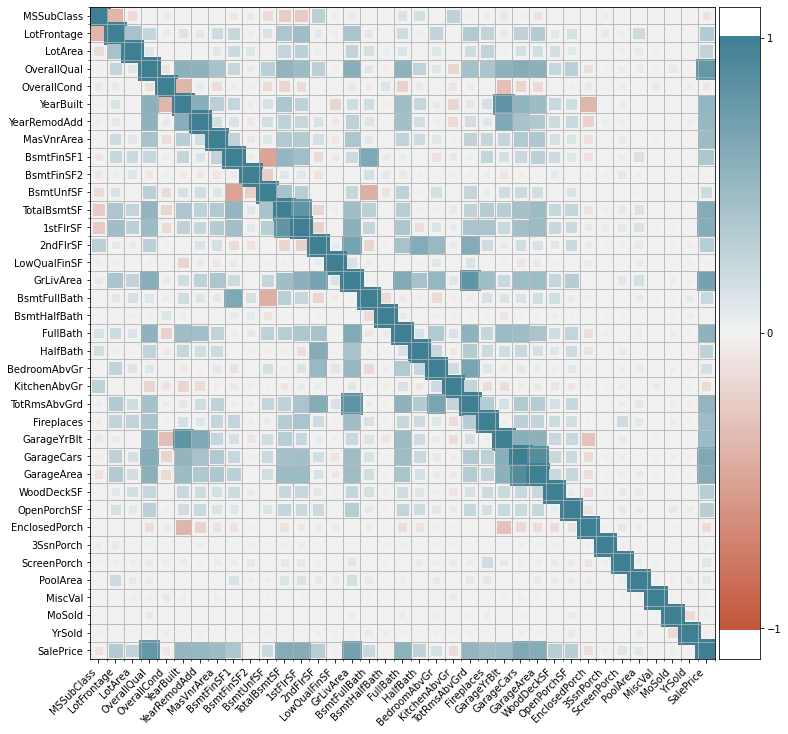

In [7]:
plt.figure(figsize=(12, 12))
corrplot(train.corr(), size_scale=500);

### Note
As we see in the above diagram there are some data that correlate with sales prices more than others.
In the diagram above, the darker the color of a blue house, the more effective it will be. <br/>
We choose 4 features for more analysis. <br/>
The first one is OverallQual which rates the overall material and finish of the house and as shown in the diagram it can correlate with the sales price more than other features. <br/>
The second is GrLivArea; Above grade (ground) living area square feet. <br/>
The third is GarageCars which is the size of a garage in car capacity. GarageArea is also the size of a garage in square feet and we think the effect of these two will be in one direction. <br/>
Fourth is TotalBsmtSF which shows total square feet of the basement area and significantly correlates with the sales price. We won't choose 1stFlrSF although it correlates with sales price, because it correlates with TotalBsmtSF significantly and we guess that its effect on sales price will be measured by just choosing TotalBsmtSF.<br/>

### 4) Log-transformation of the target variable

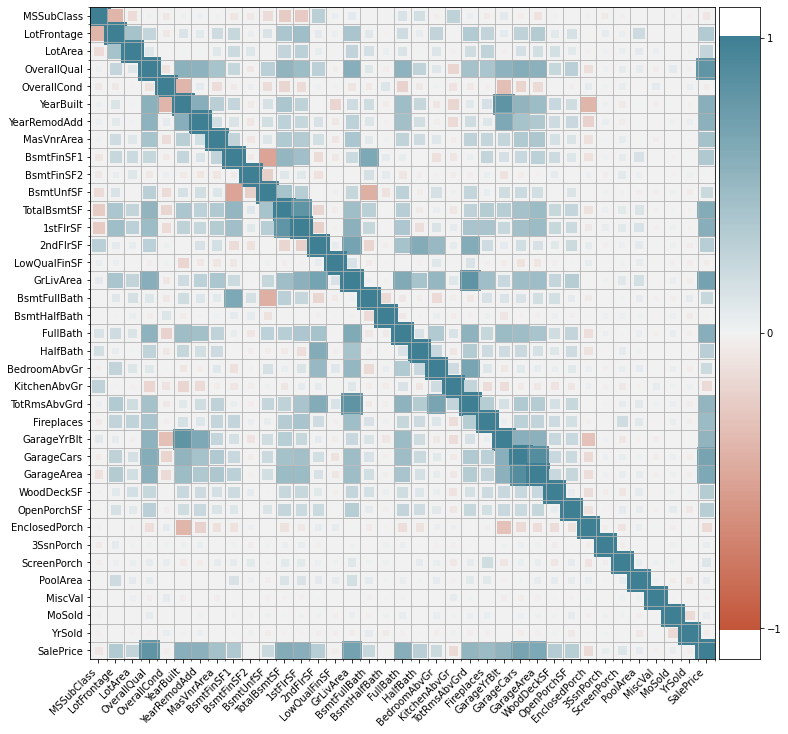

In [8]:
train_copy = train.copy()
train_copy['SalePrice'] = np.log(train_copy['SalePrice'])
plt.figure(figsize=(12, 12))
corrplot(train_copy.corr(), size_scale=500);

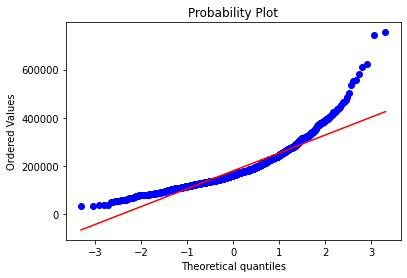

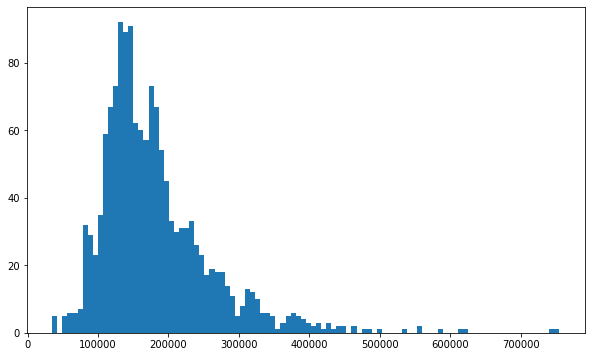

In [9]:
stats.probplot(train['SalePrice'], plot=plt)
plt.show()
train['SalePrice'].hist(bins = 100, grid = False, figsize = (10,6))
plt.show()

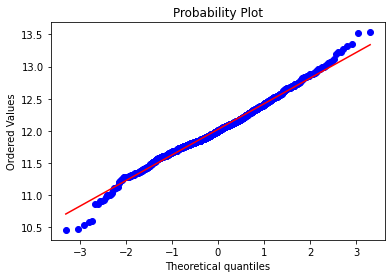

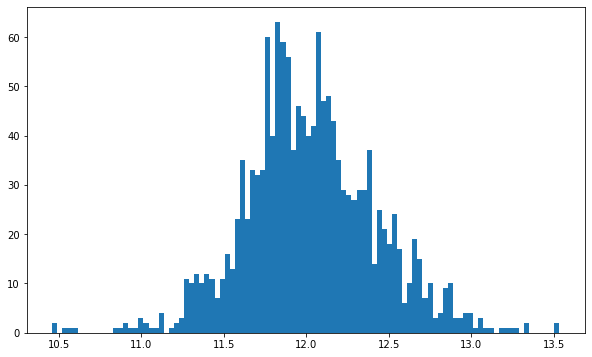

In [10]:
stats.probplot(train_copy['SalePrice'], plot=plt)
plt.show()
train_copy['SalePrice'].hist(bins = 100, grid = False, figsize = (10,6))
plt.show()

In my idea the Log-transformation won't make any change in corrolation diagram but as we can see in the above charts the graph changes from exponential to linear. Converting the graph from exponential to linear mode makes training possible with simpler models.

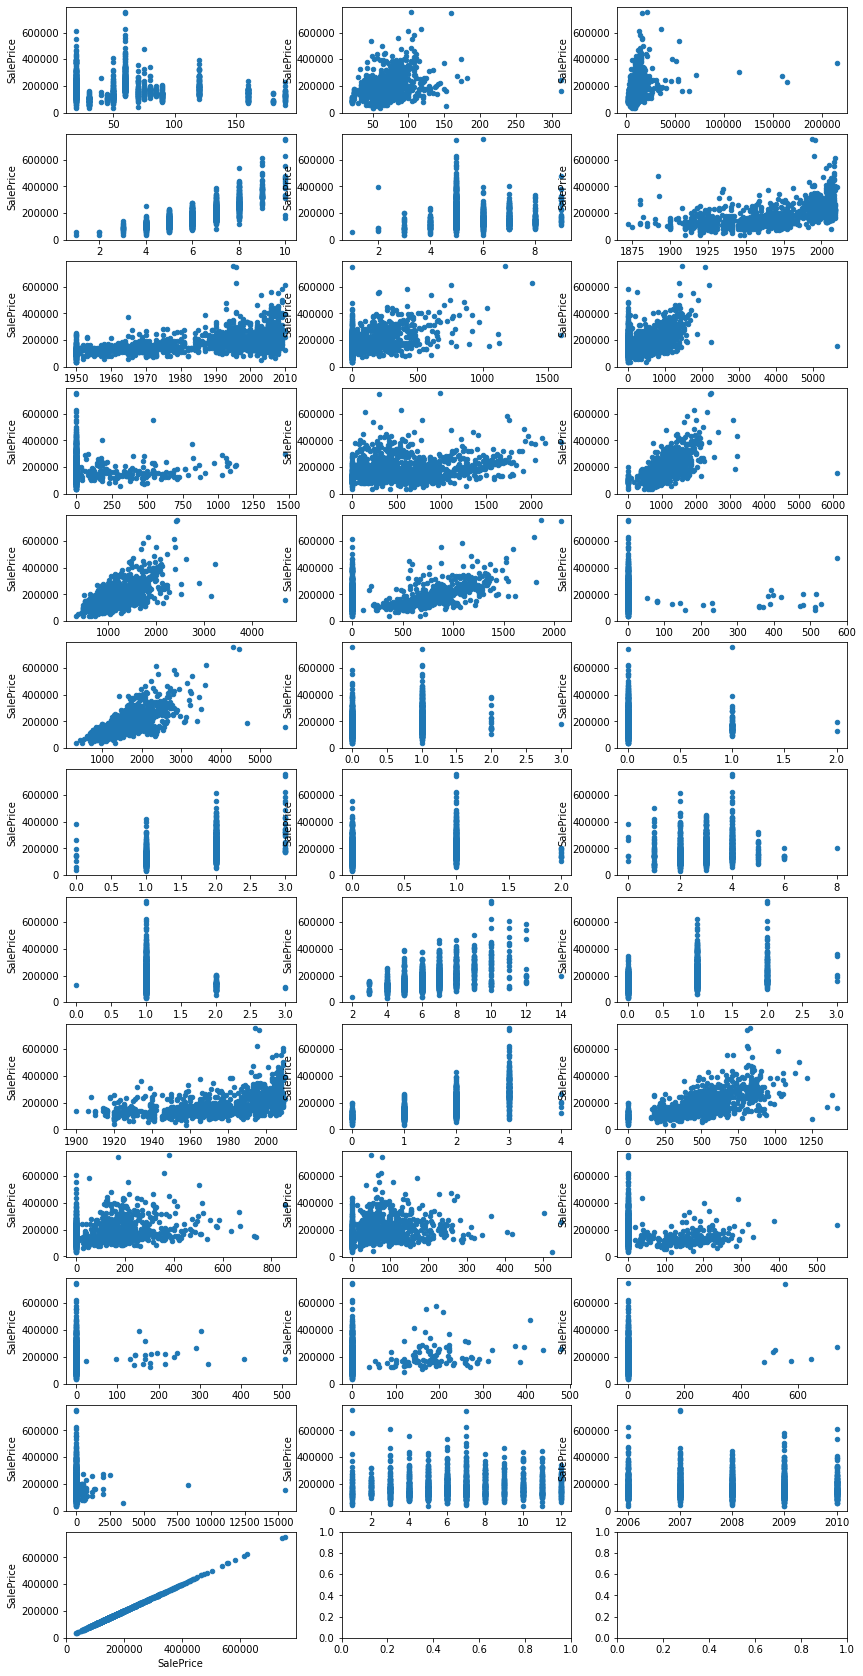

In [28]:
train_numerical_subset = train.select_dtypes(include = [np.number])
fig, axes = plt.subplots(13, 3, figsize=(14, 30))
axe = axes.ravel()
for i, col in enumerate(train_numerical_subset.columns):
    train_numerical_subset.plot(x=(col),y=('SalePrice'),ax=axe[i], kind = 'scatter')
plt.show()

### 5) Is the above corrolation plot enough to examine the data?
No, because it does not contain categorical data. we have to use another way to examine them.

### 6) correlation plots independently

NameError: name 'figure' is not defined

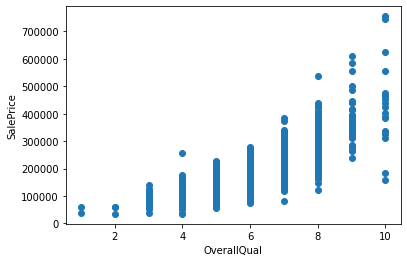

In [29]:
plt.scatter(train['OverallQual'],train['SalePrice'])
plt.ylabel('SalePrice', fontsize=10)
plt.xlabel('OverallQual', fontsize=10)
plt.show()

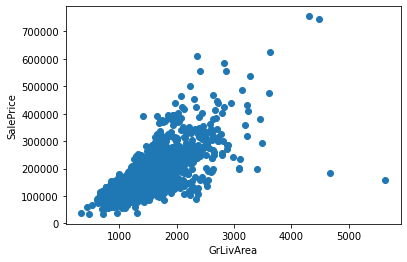

In [13]:
plt.scatter(train['GrLivArea'],train['SalePrice'])
plt.ylabel('SalePrice', fontsize=10)
plt.xlabel('GrLivArea', fontsize=10)
plt.show()

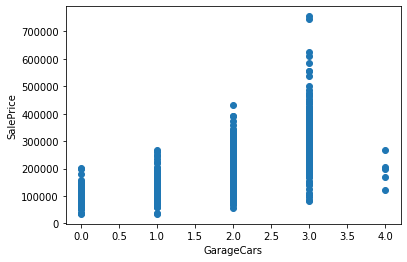

In [14]:
plt.scatter(train['GarageCars'],train['SalePrice'])
plt.ylabel('SalePrice', fontsize=10)
plt.xlabel('GarageCars', fontsize=10)
plt.show()

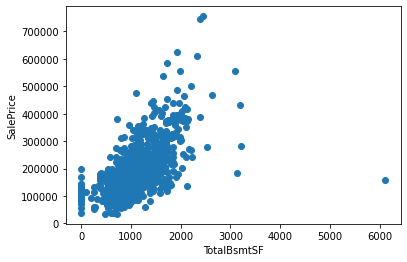

In [15]:
plt.scatter(train['TotalBsmtSF'],train['SalePrice'])
plt.ylabel('SalePrice', fontsize=10)
plt.xlabel('TotalBsmtSF', fontsize=10)
plt.show()

### Note
For OverallQual and GarageCars as shown in the plots as OverallQual and GarageCars increase, so does the sales price ceiling increase. There may be a little noise but we can ignore that. The plot shows that other features will have a significant impact on the price. <br/>
For GrLivArea and TotalBsmtSF we can consider several lines with different slopes to model.

### 7) Categorical data
In this part we are asked to choose 3 categorical feature. By reading ‫‪data_description.txt‬‬ we can choose some features measuring their importance and types (not just one type or alot of different types). after choosing those features by looking at their plot we choose three of them which the average price per type of them can divide our data well. 3 features are shown below.

In [16]:
def categorical_plot(category):
    sns.countplot(train[category])
    plt.show()
    categories = train[category].unique()
    price_mean = {}
    for i in categories:
        price_mean[i] = (train[train[category] == i].sum()['SalePrice'])/(train[train[category] == i].count()[category])
    plt.bar(range(len(price_mean)), list(price_mean.values()), align='center')
    plt.xticks(range(len(price_mean)), list(price_mean.keys()))

/home/fateme/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


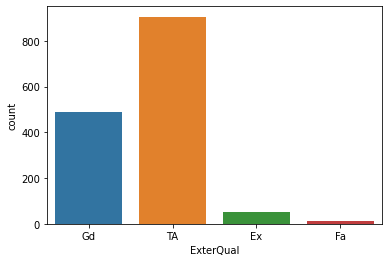

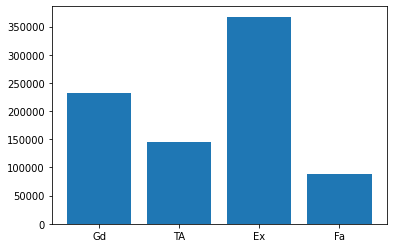

In [17]:
categorical_plot('ExterQual')

/home/fateme/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


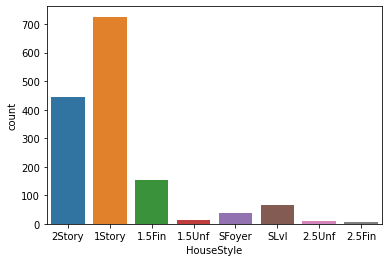

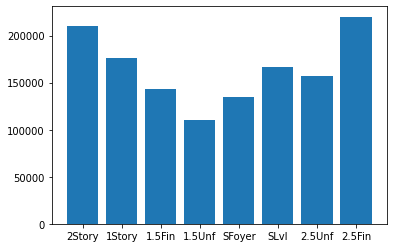

In [18]:
categorical_plot('HouseStyle')

/home/fateme/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


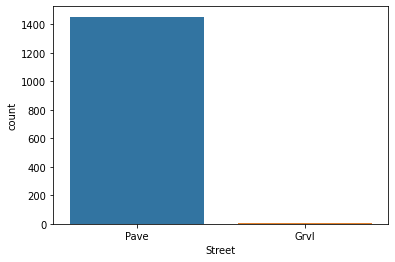

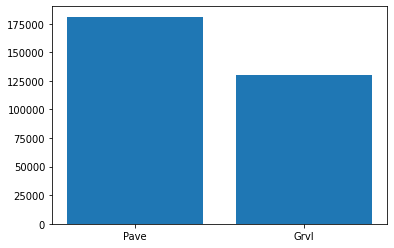

In [19]:
categorical_plot('Street')

### 8) Other anlysis.
We added other analysis in the above parts.

## ‫‪Phase 1: ‫‪Preprocessing‬‬

### 1) NaN Values:
Missing values are handled using different interpolation techniques. One way for handling NaN values is to place median instead of them. The other way is to replace them with mode value. These ways have advantages and disadvanteages. These are the most common method of data imputation, where you just replace all the missing values with the mean, median or mode of the column. While this is useful because it’s easy and fast, it changes the statistical nature of the data. Not only does this skew our histograms, it also underestimates the variance in our data because we’re making numerous values the exact same (when in reality they evidently would not be). <br/>
If we want to examine more closely, the average is noise sensitive and changes the result completely and can only be used for numerical data. Deleting data destroys a lot of important information. The median is also not very accurate. mode is suitable for both data, but we may have two types with close numbers and in this case we will get an wrong answers.


### 2) Filling NaN values.
Features like Alley, PoolQC, Fence,and MiscFeature have the most NaN values but we cannot handle them by removing them because in those cases NaN means that the house doesnt have that feature and nothing is missed or wrong. <br/> <br/>
PoolQC: NA means "No Pool". <br/>
MiscFeature: NA means "no misc feature. "<br/>
Alley: NA means "no alley access. "<br/>
Fence: NA means "no fence. "<br/>
FireplaceQu: NA means "no fireplace". <br/>
LotFrontage: Since Linear feet of street connected to property most likely is like its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood. <br/>
GarageYrBlt, GarageArea and GarageCars: Replacing missing data with 0 (Since No garage = no cars in such garage.). <br/>
BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath: Replacing missing data with 0 like above features. <br/>
BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : NaN means "no basement". <br/>
MasVnrArea: Replacing missing data with 0. <br/>
MasVnrType: NA means "no masonry veneer for these houses". Replacing missing data with None. <br/>
MSZoning: 'RL' is by far the most common value. So we can fill in missing values with 'RL'. <br/>
Utilities: 'AllPub' is by far the most common value. So we can fill in missing values with 'AllPub'. <br/>
Functional: Replacing missing data with mode. <br/>
Electrical: Replacing missing data with mode ('SBrkr'). <br/>
KitchenQual: Replacing missing data with mode ('TA'). <br/>
Exterior1st and Exterior2nd : Replacing missing data with mode. <br/>
SaleType: Replacing missing data with mode. <br/>
MSSubClass: Na means No building class. We can replace missing values with None. <br/>

In [20]:
train_filled = train.copy()
train_filled ['LotFrontage'] = train_filled.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',
            'GarageYrBlt', 'GarageArea', 'GarageCars', 'MasVnrArea'):
    train_filled[col] = train_filled[col].fillna(0)
for col in ('MSZoning', 'Utilities', 'Functional', 'Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType'):
    train_filled[col] = train_filled[col].fillna(train[col].mode())
train_filled = train_filled.fillna('None')
train_filled

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave  None      Reg   
1             20       RL         80.0     9600   Pave  None      Reg   
2             60       RL         68.0    11250   Pave  None      IR1   
3             70       RL         60.0     9550   Pave  None      IR1   
4             60       RL         84.0    14260   Pave  None      IR1   
5             50       RL         85.0    14115   Pave  None      IR1   
6             20       RL         75.0    10084   Pave  None      Reg   
7             60       RL         80.0    10382   Pave  None      IR1   
8             50       RM         51.0     6120   Pave  None      Reg   
9            190       RL         50.0     7420   Pave  None      Reg   
10            20       RL         70.0    11200   Pave  None      Reg   
11            60       RL         85.0    11924   Pave  None      IR1   
12            20       RL         71.0    12968   Pave  None      IR2   
13            20       RL         91.0    10652   Pave  None      IR1   
14            20       RL         73.0    10920   Pave  None      IR1   
15            45       RM         51.0     6120   Pave  None      Reg   
16            20       RL         73.0    11241   Pave  None      IR1   
17            90       RL         72.0    10791   Pave  None      Reg   
18            20       RL         66.0    13695   Pave  None      Reg   
19            20       RL         70.0     7560   Pave  None      Reg   
20            60       RL        101.0    14215   Pave  None      IR1   
21            45       RM         57.0     7449   Pave  Grvl      Reg   
22            20       RL         75.0     9742   Pave  None      Reg   
23           120       RM         44.0     4224   Pave  None      Reg   
24            20       RL         71.0     8246   Pave  None      IR1   
25            20       RL        110.0    14230   Pave  None      Reg   
26            20       RL         60.0     7200   Pave  None      Reg   
27            20       RL         98.0    11478   Pave  None      Reg   
28            20       RL         47.0    16321   Pave  None      IR1   
29            30       RM         60.0     6324   Pave  None      IR1   
30            70  C (all)         50.0     8500   Pave  Pave      Reg   
31            20       RL         71.0     8544   Pave  None      IR1   
32            20       RL         85.0    11049   Pave  None      Reg   
33            20       RL         70.0    10552   Pave  None      IR1   
34           120       RL         60.0     7313   Pave  None      Reg   
35            60       RL        108.0    13418   Pave  None      Reg   
36            20       RL        112.0    10859   Pave  None      Reg   
37            20       RL         74.0     8532   Pave  None      Reg   
38            20       RL         68.0     7922   Pave  None      Reg   
39            90       RL         65.0     6040   Pave  None      Reg   
40            20       RL         84.0     8658   Pave  None      Reg   
41            20       RL        115.0    16905   Pave  None      Reg   
42            85       RL         66.5     9180   Pave  None      IR1   
43            20       RL         70.0     9200   Pave  None      IR1   
44            20       RL         70.0     7945   Pave  None      Reg   
45           120       RL         61.0     7658   Pave  None      Reg   
46            50       RL         48.0    12822   Pave  None      IR1   
47            20       FV         84.0    11096   Pave  None      Reg   
48           190       RM         33.0     4456   Pave  None      Reg   
49            20       RL         66.0     7742   Pave  None      Reg   
50            60       RL         65.0    13869   Pave  None      IR2   
51            50       RM         52.0     6240   Pave  None      Reg   
52            90       RM        110.0     8472   Grvl  None      IR2   
53            20       RL         68.0    50271   Pave  None    

### 3) Normalizing and ‫‪Standardizing‬‬
Standardizing the features around the center and 0 with a standard deviation of 1 is important when we compare measurements that have different units. Variables that are measured at different scales do not contribute equally to the analysis and might end up creating a bais. <br/>
Similarly, the goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges.

### 4) Categorical features handling
Applying one Hot-Encode to categorical variables

In [27]:
train_categorical_subset = train_filled.select_dtypes(exclude = [np.number])
train_categorical_subset = pd.get_dummies(train_filled.select_dtypes(exclude = [np.number]))
train_categorical_subset

MSZoning Street Alley LotShape LandContour LotConfig LandSlope  \
0          RL   Pave  None      Reg         Lvl    Inside       Gtl   
1          RL   Pave  None      Reg         Lvl       FR2       Gtl   
2          RL   Pave  None      IR1         Lvl    Inside       Gtl   
3          RL   Pave  None      IR1         Lvl    Corner       Gtl   
4          RL   Pave  None      IR1         Lvl       FR2       Gtl   
5          RL   Pave  None      IR1         Lvl    Inside       Gtl   
6          RL   Pave  None      Reg         Lvl    Inside       Gtl   
7          RL   Pave  None      IR1         Lvl    Corner       Gtl   
8          RM   Pave  None      Reg         Lvl    Inside       Gtl   
9          RL   Pave  None      Reg         Lvl    Corner       Gtl   
10         RL   Pave  None      Reg         Lvl    Inside       Gtl   
11         RL   Pave  None      IR1         Lvl    Inside       Gtl   
12         RL   Pave  None      IR2         Lvl    Inside       Gtl   
13         RL   Pave  None      IR1         Lvl    Inside       Gtl   
14         RL   Pave  None      IR1         Lvl    Corner       Gtl   
15         RM   Pave  None      Reg         Lvl    Corner       Gtl   
16         RL   Pave  None      IR1         Lvl   CulDSac       Gtl   
17         RL   Pave  None      Reg         Lvl    Inside       Gtl   
18         RL   Pave  None      Reg         Lvl    Inside       Gtl   
19         RL   Pave  None      Reg         Lvl    Inside       Gtl   
20         RL   Pave  None      IR1         Lvl    Corner       Gtl   
21         RM   Pave  Grvl      Reg         Bnk    Inside       Gtl   
22         RL   Pave  None      Reg         Lvl    Inside       Gtl   
23         RM   Pave  None      Reg         Lvl    Inside       Gtl   
24         RL   Pave  None      IR1         Lvl    Inside       Gtl   
25         RL   Pave  None      Reg         Lvl    Corner       Gtl   
26         RL   Pave  None      Reg         Lvl    Corner       Gtl   
27         RL   Pave  None      Reg         Lvl    Inside       Gtl   
28         RL   Pave  None      IR1         Lvl   CulDSac       Gtl   
29         RM   Pave  None      IR1         Lvl    Inside       Gtl   
30    C (all)   Pave  Pave      Reg         Lvl    Inside       Gtl   
31         RL   Pave  None      IR1         Lvl   CulDSac       Gtl   
32         RL   Pave  None      Reg         Lvl    Corner       Gtl   
33         RL   Pave  None      IR1         Lvl    Inside       Gtl   
34         RL   Pave  None      Reg         Lvl    Inside       Gtl   
35         RL   Pave  None      Reg         Lvl    Inside       Gtl   
36         RL   Pave  None      Reg         Lvl    Corner       Gtl   
37         RL   Pave  None      Reg         Lvl    Inside       Gtl   
38         RL   Pave  None      Reg         Lvl    Inside       Gtl   
39         RL   Pave  None      Reg         Lvl    Inside       Gtl   
40         RL   Pave  None      Reg         Lvl    Inside       Gtl   
41         RL   Pave  None      Reg         Lvl    Inside       Gtl   
42         RL   Pave  None      IR1         Lvl   CulDSac       Gtl   
43         RL   Pave  None      IR1         Lvl   CulDSac       Gtl   
44         RL   Pave  None      Reg         Lvl    Inside       Gtl   
45         RL   Pave  None      Reg         Lvl    Inside       Gtl   
46         RL   Pave  None      IR1         Lvl   CulDSac       Gtl   
47         FV   Pave  None      Reg         Lvl    Inside       Gtl   
48         RM   Pave  None      Reg         Lvl    Inside       Gtl   
49         RL   Pave  None      Reg         Lvl    Inside       Gtl   
50         RL   Pave  None      IR2         Lvl    Corner       Gtl   
51         RM   Pave  None      Reg         Lvl    Inside       Gtl   
52         RM   Grvl  None      IR2         Bnk    Corner       Mod   
53         RL   Pave  None      IR1         Low    Inside       Gtl   
54         RL   Pave  None      Reg         Bnk    Inside       Mod   
55         RL   Pave  None   

### 5) Deleting columns
For Utilities all records are "AllPub", except for one "NoSeWa". Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.

In [22]:
train_filled = train_filled.drop(['Utilities'], axis=1)

### 6) Validation data
A key property of the validation and test sets is that they must be representative of the new data we will see in the future. <br/>
P mainly depends on 2 things. First, the total number of samples in our data and second, on the actual model we are training. Models with very few hyperparameters will be easy to validate and tune, but if your model has many hyperparameters, we want to have a large validation set as well. We are going to choose the best number for P in our model by testing different ranges. <br/>
Other way for generating validation data is by using cross validation.One round of cross-validation involves partitioning a sample of data into complementary subsets, performing the analysis on one subset (called the training set), and validating the analysis on the other subset (called the validation set or testing set). To reduce variability, in most methods multiple rounds of cross-validation are performed using different partitions, and the validation results are combined over the rounds to give an estimate of the model's predictive performance.

In [23]:
train_d, validation_d = train_test_split(train_filled,test_size=0.3, random_state=42)

In [24]:
X_train = train_d.drop(['SalePrice'], axis = 1)
y_train = np.array(train_d['SalePrice']).reshape((-1,1))
X_test = validation_d.drop(['SalePrice'], axis = 1)

In [25]:
def fit_and_evaluate (model):
    model.fit(X_train, y_train.ravel())
    pred = model.predict(X_test)
    RMSE = mean_squared_error(y_train, model_pred,squared = False)
    return RMSE

In [26]:
neigh = KNeighborsRegressor(n_neighbors=5)
knn_RMSE = fit_and_evaluate(neigh)
knn_RMSE

ValueError: could not convert string to float: 'RL'